In [2]:
!pip install ucimlrepo

In [14]:
from ucimlrepo import fetch_ucirepo
data_cancer=fetch_ucirepo(id=17)
X=data_cancer.data.features
Y=data_cancer.data.targets
X.info()
print(Y.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 30 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   radius1             569 non-null    float64
 1   texture1            569 non-null    float64
 2   perimeter1          569 non-null    float64
 3   area1               569 non-null    float64
 4   smoothness1         569 non-null    float64
 5   compactness1        569 non-null    float64
 6   concavity1          569 non-null    float64
 7   concave_points1     569 non-null    float64
 8   symmetry1           569 non-null    float64
 9   fractal_dimension1  569 non-null    float64
 10  radius2             569 non-null    float64
 11  texture2            569 non-null    float64
 12  perimeter2          569 non-null    float64
 13  area2               569 non-null    float64
 14  smoothness2         569 non-null    float64
 15  compactness2        569 non-null    float64
 16  concavit

In [16]:
X.isnull().sum()

radius1               0
texture1              0
perimeter1            0
area1                 0
smoothness1           0
compactness1          0
concavity1            0
concave_points1       0
symmetry1             0
fractal_dimension1    0
radius2               0
texture2              0
perimeter2            0
area2                 0
smoothness2           0
compactness2          0
concavity2            0
concave_points2       0
symmetry2             0
fractal_dimension2    0
radius3               0
texture3              0
perimeter3            0
area3                 0
smoothness3           0
compactness3          0
concavity3            0
concave_points3       0
symmetry3             0
fractal_dimension3    0
dtype: int64

In [20]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import LabelEncoder
from sklearn.feature_selection import SelectKBest,chi2
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression

In [24]:
le=LabelEncoder()
y_encoded=le.fit_transform(Y)
X_train,X_test,Y_train,Y_test=train_test_split(X,y_encoded,test_size=0.2,random_state=42)

/opt/anaconda3/lib/python3.12/site-packages/sklearn/preprocessing/_label.py:114: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [28]:
X_train.shape

(455, 30)

In [30]:
select_features=SelectKBest(chi2,k=10)
X_train_selected=select_features.fit_transform(X_train,Y_train)
X_test_selected=select_features.transform(X_test)

In [32]:
print(X_train_selected.shape)
print(X_test_selected.shape)

(455, 10)
(114, 10)


In [36]:
lr_model=LogisticRegression(
    penalty='12', # regularization L1- Lasso, L2-ridge,eLasticnet,None
    C=1.0, # inverse of penalty which is used to reduce the regularization parameter
    fit_intercept=True,# it includes the intercept
    random_state=None, # this is to set seed point
    solver='1bfgs',# liblinear -> when dataset is minimum or saga -> larger dataset
    max_iter=1000,# maximum iteration
    multi_class='auto',# handle both binary and multiclass
    verbose=0,
    warm_start=False,# reuse previous solution
    n_jobs=None,# number core cpu
    li_ratio=None #specify 
)

TypeError: LogisticRegression.__init__() got an unexpected keyword argument 'li_ratio'

In [38]:
lr_model = LogisticRegression(
penalty='l2',C=1.0,fit_intercept = True,
random_state = None,solver = 'lbfgs',
max_iter=1000,multi_class="auto",
verbose = 0,warm_start=False,
n_jobs=None,l1_ratio = None)

In [40]:
lr_model = LogisticRegression(
penalty='l1',C=1.0,fit_intercept = True,
random_state = None,solver = 'liblinear',
max_iter=1000,multi_class="auto",
verbose = 0,warm_start=False,
n_jobs=None)

In [42]:
lr_model.fit(X_train,Y_train)

/opt/anaconda3/lib/python3.12/site-packages/sklearn/linear_model/_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(


LogisticRegression(max_iter=1000, multi_class='auto', penalty='l1',
                   solver='liblinear')

In [44]:
y_pred = lr_model.predict(X_test)

In [46]:
from sklearn.metrics import classification_report,ConfusionMatrixDisplay,accuracy_score,confusion_matrix

In [48]:
accuracy = accuracy_score(Y_test,y_pred)
accuracy

0.956140350877193

In [50]:
print(classification_report(Y_test,y_pred))


              precision    recall  f1-score   support

           0       0.95      0.99      0.97        71
           1       0.97      0.91      0.94        43

    accuracy                           0.96       114
   macro avg       0.96      0.95      0.95       114
weighted avg       0.96      0.96      0.96       114



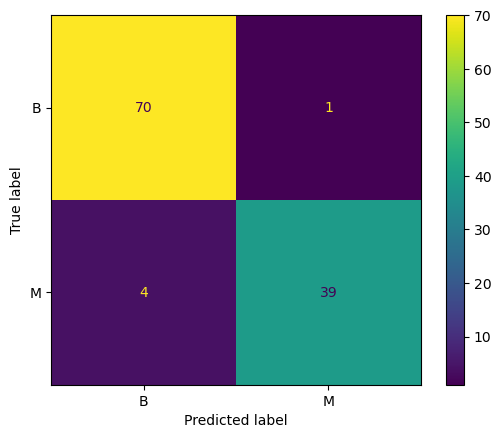

In [52]:
cm=confusion_matrix(Y_test,y_pred)
cmat=ConfusionMatrixDisplay(cm,display_labels=np.unique(Y).tolist())
cmat.plot()

In [56]:
from sklearn.tree import DecisionTreeClassifier,plot_tree
features_data=X.columns
dt=DecisionTreeClassifier(
    criterion='gini', # Or entropy
    splitter='best',# None
    max_depth=10, # or integer
    min_samples_split=2, # Minimum 2 sample to decide
    min_samples_leaf=1,
    max_features=None, #auto,sqrt,l2,None
    random_state=None
)

In [58]:
X_train,X_test,Y_train,Y_test=train_test_split(X,y_encoded,test_size=0.2,random_state=42)

In [60]:
X_train.shape

(455, 30)

In [62]:
dt.fit(X_train,Y_train)

DecisionTreeClassifier(max_depth=10)

In [64]:
y_pred_dt=dt.predict(X_test)

In [68]:
print(classification_report(Y_test,y_pred_dt))
print(accuracy_score(Y_test,y_pred_dt))

              precision    recall  f1-score   support

           0       0.94      0.93      0.94        71
           1       0.89      0.91      0.90        43

    accuracy                           0.92       114
   macro avg       0.91      0.92      0.92       114
weighted avg       0.92      0.92      0.92       114

0.9210526315789473
